In [1]:
%autosave 0

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Autosave disabled


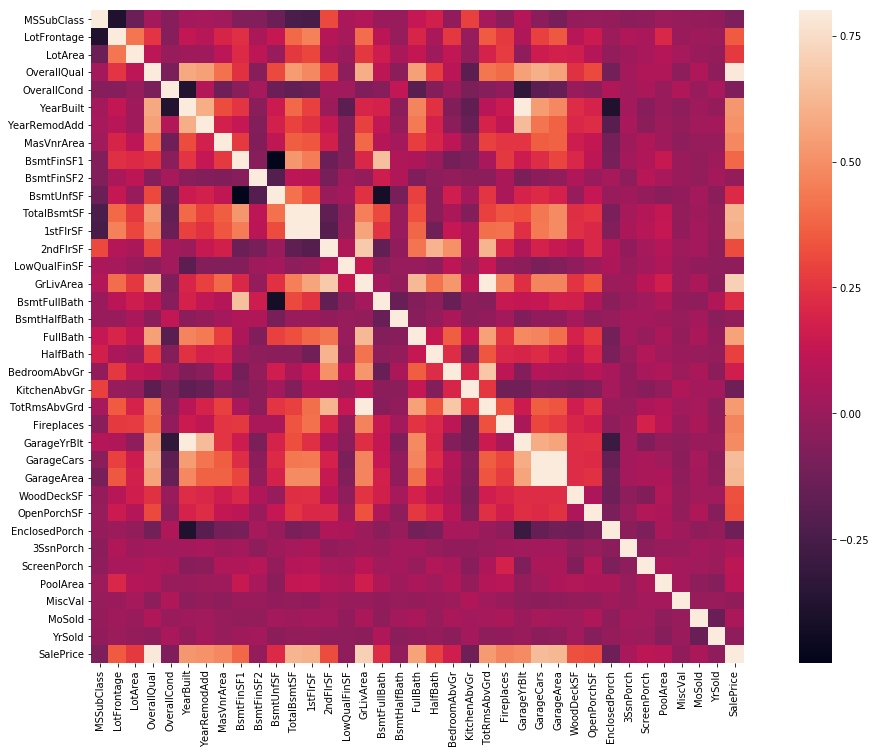

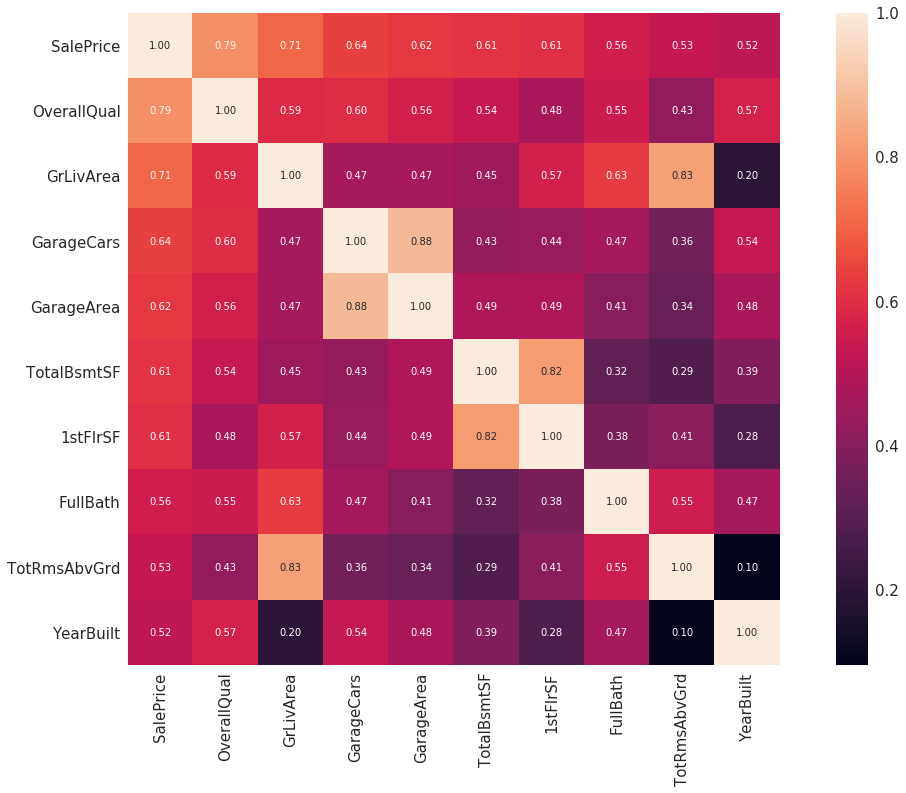

In [2]:
train_corr = train.drop('Id', axis=1).corr()

a = plt.subplots(figsize=(20,12))
a = sns.heatmap(train_corr,
               vmax=.8,
               square=True)

k = 10
cols = train_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(20,12))
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':10},
                yticklabels=cols.values,
                xticklabels=cols.values)
plt.show()

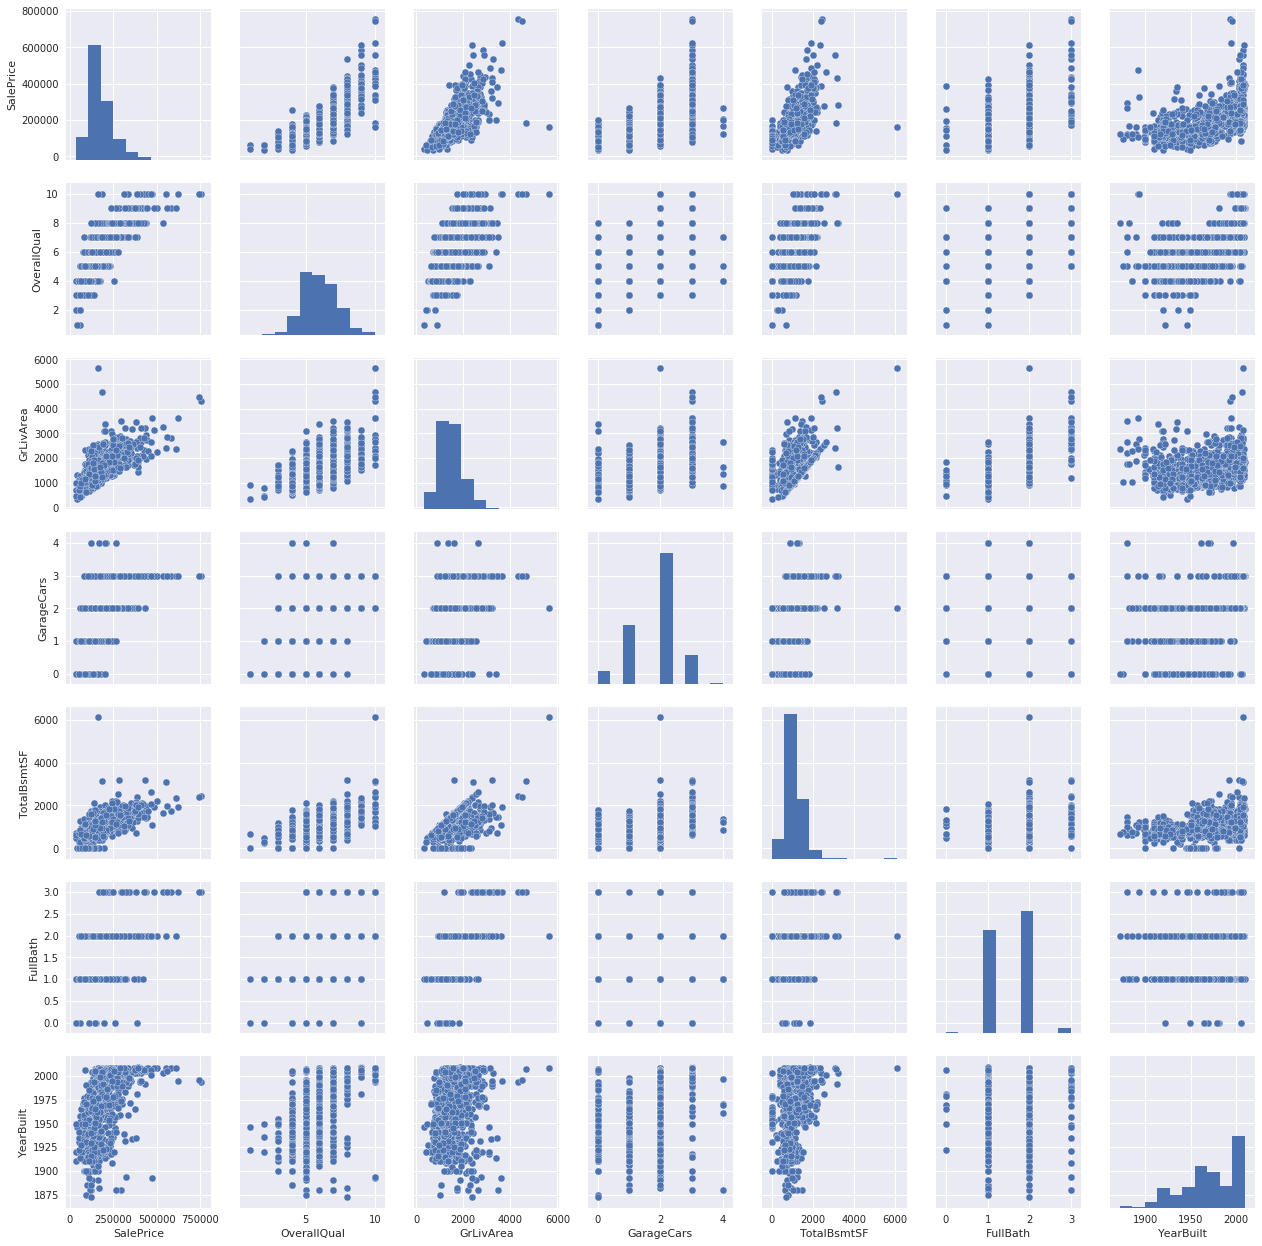

In [3]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size=2.5)
plt.show()

              Total  Lost Percent
PoolQC         2909      0.996574
PoolQC         2909      0.996574
MiscFeature    2814      0.964029
MiscFeature    2814      0.964029
Alley          2721      0.932169
Alley          2721      0.932169
Fence          2348      0.804385
Fence          2348      0.804385
SalePrice      1459      0.499829
SalePrice      1459      0.499829
FireplaceQu    1420      0.486468
FireplaceQu    1420      0.486468
LotFrontage     486      0.166495
LotFrontage     486      0.166495
GarageFinish    159      0.054471
GarageCond      159      0.054471
GarageCond      159      0.054471
GarageFinish    159      0.054471
GarageQual      159      0.054471
GarageYrBlt     159      0.054471
1
Skewness: 1.882876
Kurtosis: 6.536282


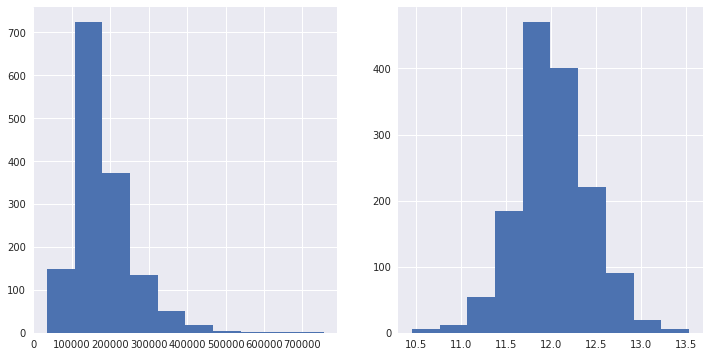

In [4]:
test['SalePrice'] = None
train_test = pd.concat((train, test)).reset_index(drop=True)

total = train_test.isnull().sum().sort_values(ascending=False)
percent = (train_test.isnull().sum() / train_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Lost Percent'])

print(missing_data[missing_data.isnull().values==False].sort_values('Total', axis=0, ascending=False).head(20))

train_test = train_test.drop((missing_data[missing_data['Total'] > 1]).index.drop('SalePrice'), axis=1)
tmp = train_test[train_test['SalePrice'].isnull().values==False]
print(tmp.isnull().sum().max())

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(train.SalePrice)
ax2.hist(np.log1p(train.SalePrice))

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1298         Bnk    AllPub    ...          480     Gd   NaN         NaN   
523          Bnk    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298       0      1   2008       New        Partial     160000  
523        0     10   2007       New        Partial     184750  

[2 rows x 81 columns]


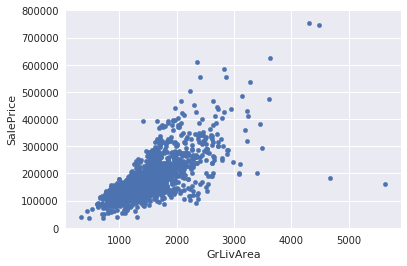

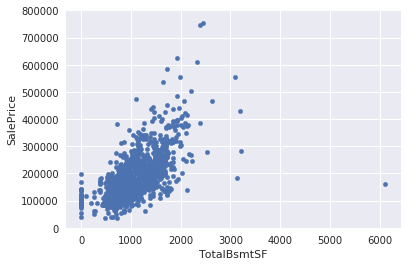

In [5]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

print(train.sort_values(by='GrLivArea', ascending = False)[:2])
tmp = train_test[train_test['SalePrice'].isnull().values==False]

train_test = train_test.drop(tmp[tmp['Id'] == 1299].index)
train_test = train_test.drop(tmp[tmp['Id'] == 524].index)

var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000))

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


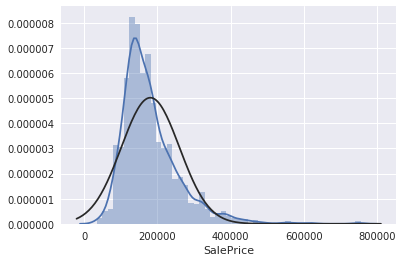

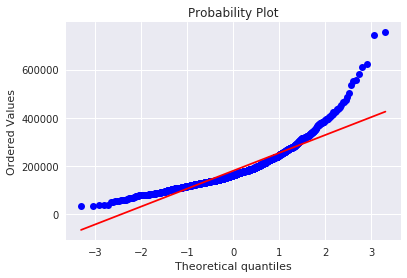

In [6]:
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [8]:
train_test['SalePrice'] = [i if i is None else np.log1p(i) for i in train_test['SalePrice']]

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


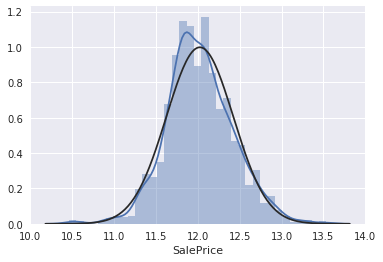

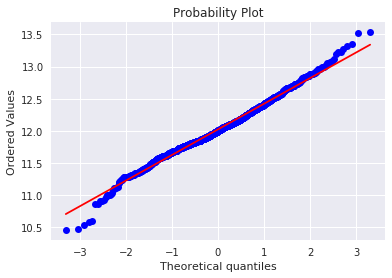

In [9]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

sns.distplot(tmp[tmp['SalePrice'] != 0]['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(tmp['SalePrice'], plot=plt)

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


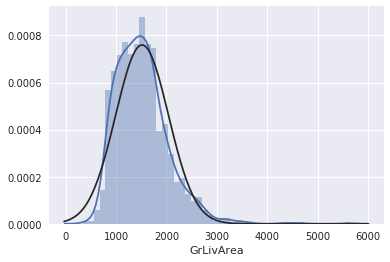

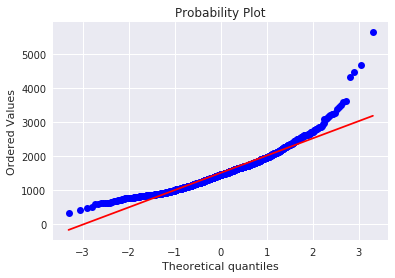

In [10]:
sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


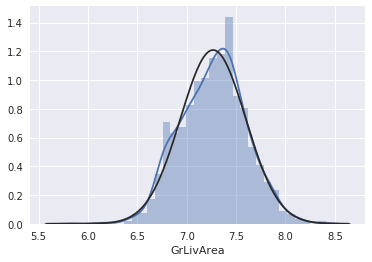

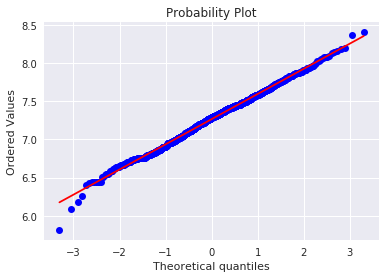

In [11]:
train_test['GrLivArea'] = [i if i is None else np.log1p(i) for i in train_test['GrLivArea']]

tmp = train_test[train_test['SalePrice'].isnull().values==False]
sns.distplot(tmp['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(tmp['GrLivArea'], plot=plt)

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


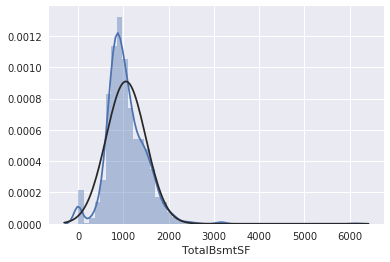

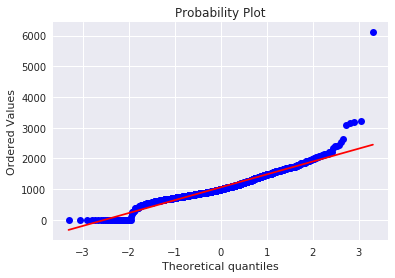

In [12]:
sns.distplot(train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


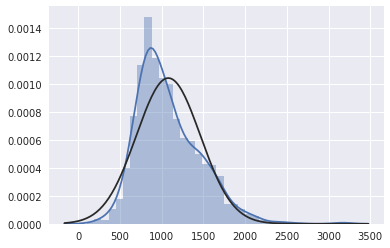

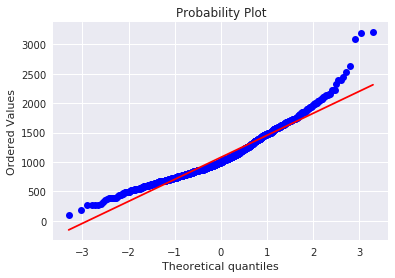

In [14]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

tmp = np.array(tmp.loc[tmp['TotalBsmtSF'] > 0, ['TotalBsmtSF']])[:,0]
sns.distplot(tmp, fit=norm)
fig = plt.figure()
res = stats.probplot(tmp, plot=plt)

In [15]:
print(train.loc[train['TotalBsmtSF'] == 0, ['TotalBsmtSF']].count())
train.loc[train['TotalBsmtSF'] == 0, 'TotalBsmtSF'] = 1
print(train.loc[train['TotalBsmtSF'] == 1, ['TotalBsmtSF']].count())

TotalBsmtSF    37
dtype: int64
TotalBsmtSF    37
dtype: int64


In [16]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

print(tmp['TotalBsmtSF'].head(10))
train_test['TotalBsmtSF'] = np.log1p(train_test['TotalBsmtSF'])

tmp = train_test[train_test['SalePrice'].isnull().values==False]
print(tmp['TotalBsmtSF'].head(10))

0     856.0
1    1262.0
2     920.0
3     756.0
4    1145.0
5     796.0
6    1686.0
7    1107.0
8     952.0
9     991.0
Name: TotalBsmtSF, dtype: float64
0    6.753438
1    7.141245
2    6.825460
3    6.629363
4    7.044033
5    6.680855
6    7.430707
7    7.010312
8    6.859615
9    6.899723
Name: TotalBsmtSF, dtype: float64


/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


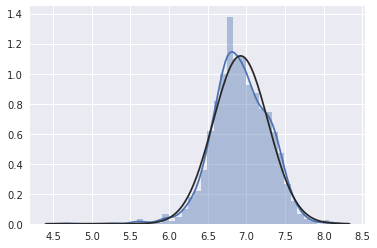

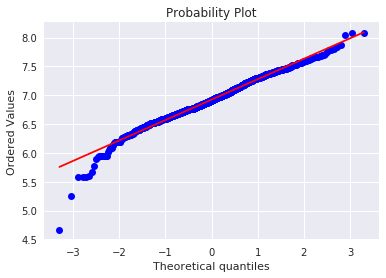

In [17]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

tmp = np.array(tmp.loc[tmp['TotalBsmtSF'] > 0, ['TotalBsmtSF']])[:,0]
sns.distplot(tmp, fit=norm)
fig = plt.figure()
res = stats.probplot(tmp, plot=plt)

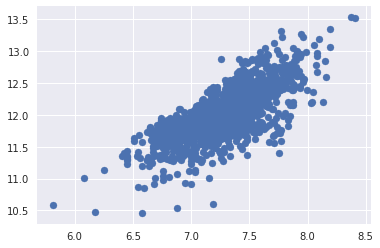

In [18]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]

plt.scatter(tmp['GrLivArea'], tmp['SalePrice'])

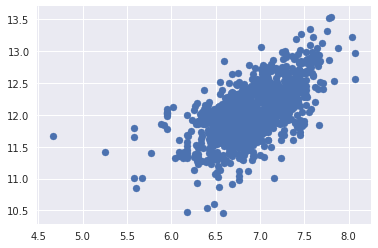

In [22]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]
plt.scatter(tmp[tmp['TotalBsmtSF'] > 0]['TotalBsmtSF'], tmp[tmp['TotalBsmtSF'] > 0]['SalePrice'])

In [23]:
tmp = train_test[train_test['SalePrice'].isnull().values==False]
tmp_1 = train_test[train_test['SalePrice'].isnull().values==True]

x_train = tmp[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']]
y_train = tmp[['SalePrice']].values.ravel()
x_test = tmp_1[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']]

x_test['GarageCars'].fillna(x_test.GarageCars.median(), inplace=True)
x_test['TotalBsmtSF'].fillna(x_test.TotalBsmtSF.median(), inplace=True)

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0.1664062609409366


Text(0.5,1,'n_estimators vs CV error')

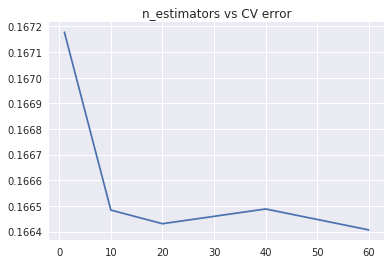

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

ridge = Ridge(alpha=0.1)

params = [1,10,20,40,60]
test_scores = []
for param in params:
    clf = BaggingRegressor(base_estimator=ridge,
                          n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

print(test_score.mean())
plt.plot(params, test_scores)
plt.title('n_estimators vs CV error')

In [34]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
# import lightgbm as lgb

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import RobustScaler

lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000,
                                  learning_rate=0.05,
                                  max_depth=4,
                                  max_features='sqrt',
                                  min_samples_leaf=15,
                                  min_samples_split=10,
                                  loss='huber',
                                  random_state=5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603,
                            gamma=0.0468,
                            learning_rate=0.05,
                            max_depth=3,
                            min_child_weight=1.7817,
                            n_estimators=2200,
                            reg_alpha=0.4640,
                            reg_lambda=0.8571,
                            subsample=0.5213,
                            silent=1,
                            random_state=7,
                            nthread=-1)

# model_lgb = lgb.LGBMRegressor(objective='regression',
#                              num_leaves=5,
#                              learning_rate=0.05,
#                              n_estimators=720,
#                              max_bin=55,
#                              bagging_fraction=0.8,
#                              bagging_freq=5,
#                              feature_fraction=0.2319,
#                              feature_fraction_seed=9,
#                              bagging_seed=9,
#                              min_data_in_leaf=6,
#                              min_sum_hessian_in_leaf=11)



NameError: name 'rmsle_cv' is not defined


Lasso score: 0.1665 (0.0057)

ElasticNet score: 0.1665 (0.0057)

Kernel Ridge score: 0.1562 (0.0047)

Gradient Boosting score: 0.1643 (0.0091)

Xgboost score: 0.1566 (0.0059)



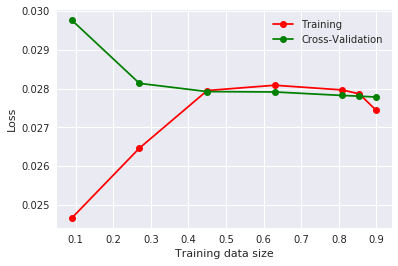

In [37]:
from sklearn.model_selection import KFold

n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)



score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print(
    "Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(),
                                                          score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# score = rmsle_cv(model_lgb)
# print("LGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve

ridge = Ridge(alpha=0.1)

train_sizes, train_loss, test_loss = learning_curve(ridge, x_train, y_train, cv=10, 
                                                    scoring='neg_mean_squared_error',
                                                    train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9 , 0.95, 1])

# 训练误差均值
train_loss_mean = -np.mean(train_loss, axis = 1)
# 测试误差均值
test_loss_mean = -np.mean(test_loss, axis = 1)

# 绘制误差曲线
plt.plot(train_sizes/len(x_train), train_loss_mean, 'o-', color = 'r', label = 'Training')
plt.plot(train_sizes/len(x_train), test_loss_mean, 'o-', color = 'g', label = 'Cross-Validation')

plt.xlabel('Training data size')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

In [38]:
mode_br = BaggingRegressor(base_estimator=ridge, n_estimators=10)
mode_br.fit(x_train, y_train)
y_test = np.expm1(mode_br.predict(x_test))

In [39]:
# 模型融合
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]

        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self

    # Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack(
            [model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)


# 评价这四个模型的好坏
averaged_models = AveragingModels(models=(ENet, GBoost, KRR, lasso))
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(),
                                                              score.std()))



NameError: name 'BaseEstimator' is not defined

In [ ]:
# 最终对模型的训练和预测
# StackedRegressor
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

# XGBoost
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))
# lightGBM
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train, stacked_train_pred * 0.70 + xgb_train_pred * 0.15 +
            lgb_train_pred * 0.15))
# 模型融合的预测效果
ensemble = stacked_pred * 0.70 + xgb_pred * 0.15 + lgb_pred * 0.15
# 保存结果
result = pd.DataFrame()
result['Id'] = test_ID
result['SalePrice'] = ensemble
# index=False 是用来除去行编号
result.to_csv('/Users/liudong/Desktop/house_price/result.csv', index=False)